In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import glob

#from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import category_encoders as ce

import da_func
#import data_preprocessing

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
루트경로 = '../'

데이터경로 = 루트경로 + 'data/'

In [4]:
train_df = pd.read_csv(데이터경로 + 'org/train.csv')
test_df = pd.read_csv(데이터경로 + 'org/test.csv')

In [5]:
print(train_df.shape)
train_df.head()

(600000, 25)


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [74]:
print(test_df.shape)
test_df.head()

(400000, 24)


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


In [6]:
all_data = dict()

---
### 컬럼별 전환
#### bin 컬럼 전환

In [7]:
bin_cols = train_df.columns[train_df.columns.str.contains('bin')]
print(bin_cols)
train_df.loc[:, bin_cols]

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'], dtype='object')


,bin_0,bin_1,bin_2,bin_3,bin_4
0,0.0,0.0,0.0,F,N
1,1.0,1.0,0.0,F,Y
2,0.0,1.0,0.0,F,N
3,NaN,0.0,0.0,F,N
4,0.0,NaN,0.0,T,N
...,...,...,...,...,...
599995,0.0,1.0,0.0,T,N
599996,1.0,0.0,0.0,T,Y
599997,0.0,0.0,0.0,F,Y
599998,1.0,1.0,0.0,F,Y


1. 0값으로 채우기
2. -1값으로 채우기
3. One Hot Encoding

In [8]:
bin0 = train_df.loc[:, bin_cols].copy()

bin0.loc[bin0['bin_3'] == 'F', 'bin_3'] = 0.
bin0.loc[bin0['bin_3'] == 'T', 'bin_3'] = 1.

bin0.loc[bin0['bin_4'] == 'N', 'bin_4'] = 0.
bin0.loc[bin0['bin_4'] == 'Y', 'bin_4'] = 1.

bin0 = bin0.fillna(0.)

bin0

,bin_0,bin_1,bin_2,bin_3,bin_4
0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
599995,0.0,1.0,0.0,1.0,0.0
599996,1.0,0.0,0.0,1.0,1.0
599997,0.0,0.0,0.0,0.0,1.0
599998,1.0,1.0,0.0,0.0,1.0


In [9]:
bin_1 = train_df.loc[:, bin_cols].copy()

bin_1.loc[bin_1['bin_3'] == 'F', 'bin_3'] = 0.
bin_1.loc[bin_1['bin_3'] == 'T', 'bin_3'] = 1.

bin_1.loc[bin_1['bin_4'] == 'N', 'bin_4'] = 0.
bin_1.loc[bin_1['bin_4'] == 'Y', 'bin_4'] = 1.

bin_1 = bin_1.fillna(-1.)

bin_1

,bin_0,bin_1,bin_2,bin_3,bin_4
0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,-1.0,0.0,0.0,0.0,0.0
4,0.0,-1.0,0.0,1.0,0.0
...,...,...,...,...,...
599995,0.0,1.0,0.0,1.0,0.0
599996,1.0,0.0,0.0,1.0,1.0
599997,0.0,0.0,0.0,0.0,1.0
599998,1.0,1.0,0.0,0.0,1.0


In [23]:
# bin_oh = bin_1.copy()
# for c in bin_oh.columns:
#     dum = pd.get_dummies(bin_oh[c])
#     bin_oh['%s_0' % c] = dum.loc[:, 0.0]
#     bin_oh['%s_1' % c] = dum.loc[:, 1.0]
# bin_oh = bin_oh.iloc[:, 5:]
# bin_oh

In [24]:
all_data['bin'] = [bin0, bin_1] #bin_oh

---
#### nominal 컬럼 전환
##### nom_0~4 : low cardinality

In [12]:
nom_cols = train_df.columns[train_df.columns.str.contains('nom')]
nom_l = nom_cols[:5]
nom_h = nom_cols[5:]
print(nom_l)
display(train_df.loc[:, nom_l])

Index(['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'], dtype='object')


,nom_0,nom_1,nom_2,nom_3,nom_4
0,Red,Trapezoid,Hamster,Russia,Bassoon
1,Red,Star,Axolotl,NaN,Theremin
2,Red,NaN,Hamster,Canada,Bassoon
3,Red,Circle,Hamster,Finland,Theremin
4,Red,Triangle,Hamster,Costa Rica,NaN
...,...,...,...,...,...
599995,Red,Polygon,Axolotl,India,Theremin
599996,Blue,Polygon,Dog,Costa Rica,Oboe
599997,Red,Circle,Axolotl,Russia,Theremin
599998,NaN,Polygon,Axolotl,NaN,Piano


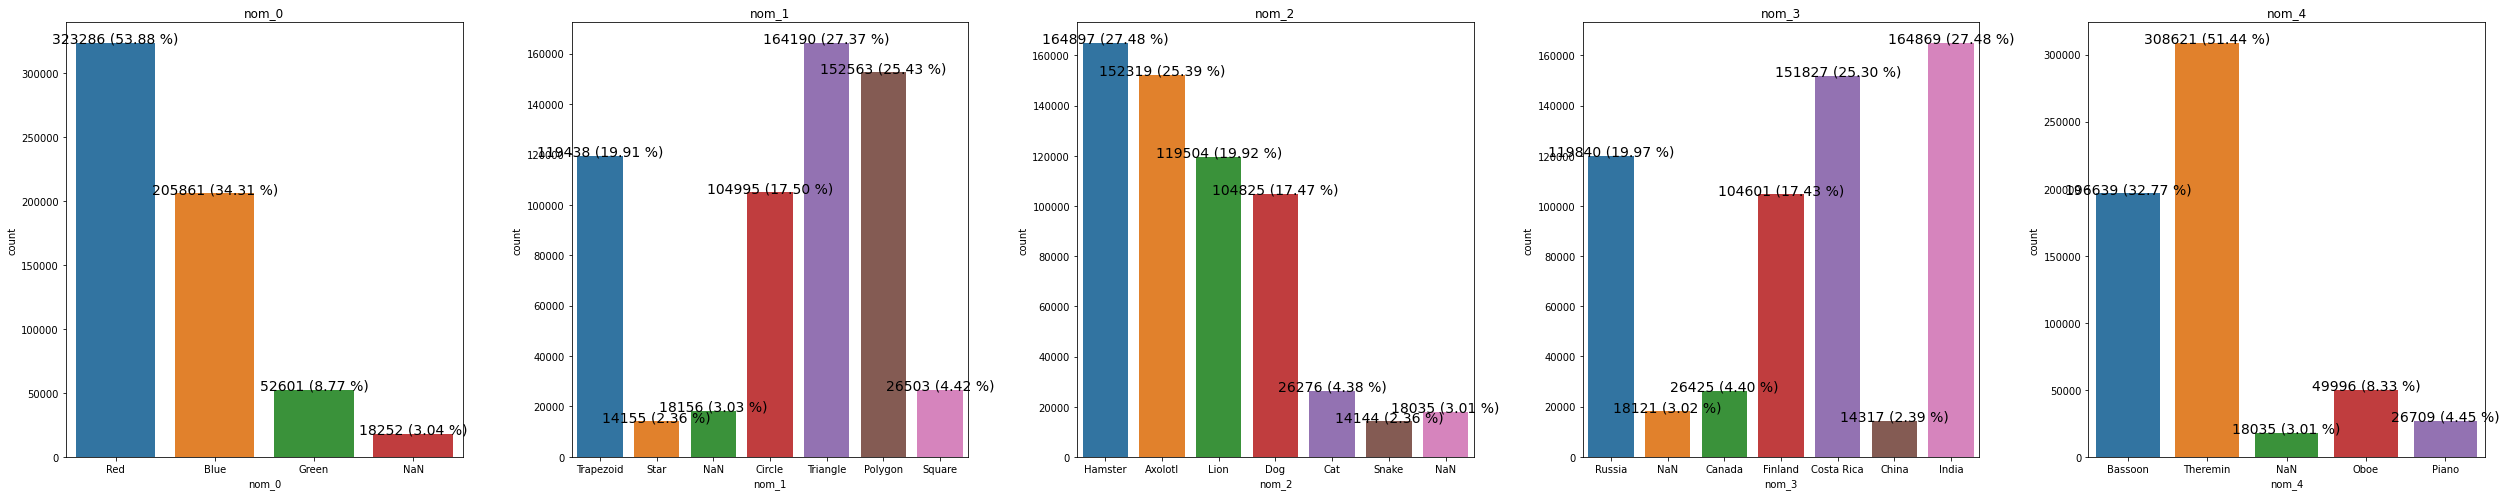

In [13]:
da_func.countplot_cols(train_df, nom_l, ncols=5, dropna=False)

In [14]:
eqsample = pd.concat([train_df[train_df['target'] == 1].sample(n=100000), train_df[train_df['target'] == 0].sample(n=100000)])

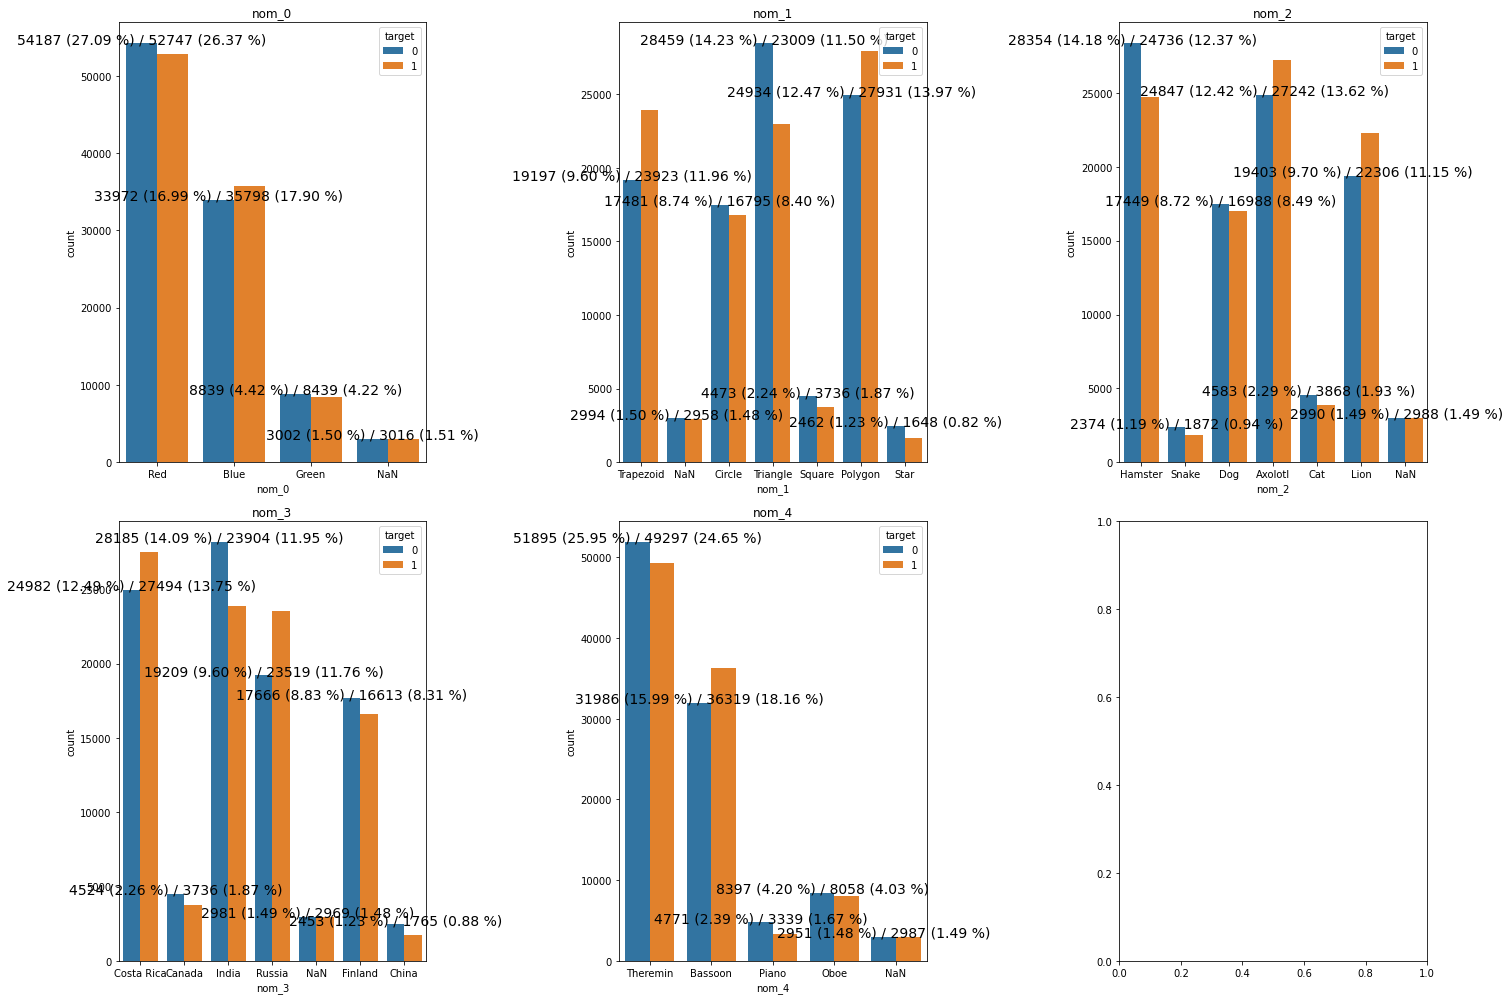

In [21]:
da_func.countplot_cols(eqsample, nom_l, hue='target', ncols=3, dropna=False)

1. one-hot encoding
 - 전체 다 one hot
 - 비중 높은 것만/significant 한 것만 남기기?
2. leave-one-out encoding

In [25]:
nom_oh = train_df.loc[:, nom_l].copy()
nom_oh.fillna

nom_oh = train_df.loc[:, nom_l].copy()
nom_oh = nom_oh.fillna('NaN')
for c in nom_oh.columns:
    dum = pd.get_dummies(nom_oh[c])
    for d in dum.columns:
        nom_oh['%s_%s' % (c, d)] = dum.loc[:, d]
nom_oh = nom_oh.iloc[:, 5:]
nom_oh = nom_oh.loc[:, nom_oh.columns.str.contains('NaN') == False]
nom_oh

,nom_0_Blue,nom_0_Green,nom_0_Red,nom_1_Circle,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Axolotl,...,nom_3_Canada,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Bassoon,nom_4_Oboe,nom_4_Piano,nom_4_Theremin
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
599996,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
599997,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
599998,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [26]:
nom_oh.columns

Index(['nom_0_Blue', 'nom_0_Green', 'nom_0_Red', 'nom_1_Circle',
       'nom_1_Polygon', 'nom_1_Square', 'nom_1_Star', 'nom_1_Trapezoid',
       'nom_1_Triangle', 'nom_2_Axolotl', 'nom_2_Cat', 'nom_2_Dog',
       'nom_2_Hamster', 'nom_2_Lion', 'nom_2_Snake', 'nom_3_Canada',
       'nom_3_China', 'nom_3_Costa Rica', 'nom_3_Finland', 'nom_3_India',
       'nom_3_Russia', 'nom_4_Bassoon', 'nom_4_Oboe', 'nom_4_Piano',
       'nom_4_Theremin'],
      dtype='object')

In [28]:
nom_oh_sig = nom_oh.copy()
nom_oh_sig = nom_oh_sig[['nom_1_Trapezoid', 'nom_1_Triangle', 'nom_1_Polygon',
                         'nom_2_Hamster', 'nom_2_Axolotl', 'nom_2_Lion',
                         'nom_3_Costa Rica', 'nom_3_Russia', 'nom_3_India', 
                         'nom_4_Bassoon', 'nom_4_Theremin']]

In [29]:
loo = ce.leave_one_out.LeaveOneOutEncoder(verbose=1, random_state=42)
nom_l_loo = loo.fit_transform(train_df.loc[:, nom_l], train_df['target'])
nom_l_loo

,nom_0,nom_1,nom_2,nom_3,nom_4
0,0.183068,0.225466,0.168015,0.219536,0.207376
1,0.183068,0.130211,0.201106,0.185872,0.179574
2,0.183068,0.182815,0.168015,0.159855,0.207376
3,0.183068,0.179696,0.168015,0.178948,0.179574
4,0.183068,0.157361,0.168015,0.202837,0.185538
...,...,...,...,...,...
599995,0.183068,0.205418,0.201106,0.163367,0.179574
599996,0.195764,0.205418,0.181886,0.202837,0.180638
599997,0.183068,0.179696,0.201106,0.219536,0.179574
599998,0.185305,0.205418,0.201106,0.185872,0.140332


In [30]:
all_data['nom_l'] = [nom_oh, nom_oh_sig, nom_l_loo]

##### nom_5~9 : high cardinality

In [31]:
print(nom_h)
display(train_df.loc[:, nom_h])

Index(['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], dtype='object')


,nom_5,nom_6,nom_7,nom_8,nom_9
0,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990
1,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af
2,b574c9841,708248125,5ddc9a726,745b909d1,NaN
3,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57
4,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c
...,...,...,...,...,...
599995,014770cf0,da5014b01,a7059911d,158183c63,015c63324
599996,NaN,2023ed4ed,83bdea3a5,e9fde8fa8,a02ae6a63
599997,c7dc5d460,5d7d341ac,114b1dbf3,cccbca824,40f9610c1
599998,4d7780407,209e1054e,fba315672,4164322bd,c1a8374a0


1. 16진수 -> 10진수 인코딩 (사실 무언가의 세션 넘버 같아보이긴 하지만... 일단은 16진수는 맞는 것 같으니)
2. leave one out encoding

In [39]:
nom_h_16 = train_df.loc[:, nom_h].copy()
nom_h_16 = nom_h_16.fillna('000000000')
for c in nom_h:
    #print(c)
    nom_h_16[c] = nom_h_16[c].apply(lambda x: int(x, 16))
nom_h_16

nom_5
nom_6
nom_7
nom_8
nom_9


,nom_5,nom_6,nom_7,nom_8,nom_9
0,59672723170,44639747551,24025500305,627866187,779913616
1,11731222108,15630677736,8017118323,22257939724,65361896623
2,48709277761,30201381157,25195816742,31234525649,0
3,27711631862,9644510627,15623715168,50912914897,67063082583
4,32075000876,15696617030,50630240916,0,52938474364
...,...,...,...,...,...
599995,343346416,58602900225,44834591005,5772950627,365310756
599996,0,8627606765,35364184997,62811705256,42994657891
599997,53649724512,25095782828,4642167795,54974523428,17441362113
599998,20794835975,8755676494,67548305010,17553367741,51984430240


In [40]:
loo = ce.leave_one_out.LeaveOneOutEncoder(verbose=1, random_state=42)
nom_h_loo = loo.fit_transform(train_df.loc[:, nom_h], train_df['target'])
nom_h_loo

,nom_5,nom_6,nom_7,nom_8,nom_9
0,0.210269,0.162393,0.103356,0.128589,0.165049
1,0.194030,0.201373,0.129039,0.197359,0.153119
2,0.181564,0.163934,0.262826,0.172647,0.187860
3,0.207705,0.203735,0.144243,0.224138,0.270270
4,0.153098,0.162698,0.195512,0.191788,0.250447
...,...,...,...,...,...
599995,0.146143,0.148036,0.215008,0.224975,0.156364
599996,0.181752,0.191781,0.196907,0.192840,0.156716
599997,0.189501,0.176471,0.220058,0.111185,0.203562
599998,0.206485,0.153693,0.261896,0.288805,0.181102


In [42]:
all_data['nom_h'] = [nom_h_16, nom_h_loo]

---
#### ord 데이터 변환
##### low-cardinality ordinal data

In [43]:
ord_cols = train_df.columns[train_df.columns.str.contains('ord')]
ord_l = ord_cols[:3]
ord_h = ord_cols[3:]
print(ord_l)
display(train_df.loc[:, ord_l])

Index(['ord_0', 'ord_1', 'ord_2'], dtype='object')


,ord_0,ord_1,ord_2
0,3.0,Contributor,Hot
1,3.0,Grandmaster,Warm
2,3.0,NaN,Freezing
3,1.0,Novice,Lava Hot
4,3.0,Grandmaster,Cold
...,...,...,...
599995,3.0,Novice,Freezing
599996,2.0,Novice,Boiling Hot
599997,2.0,Contributor,Freezing
599998,1.0,Master,Warm


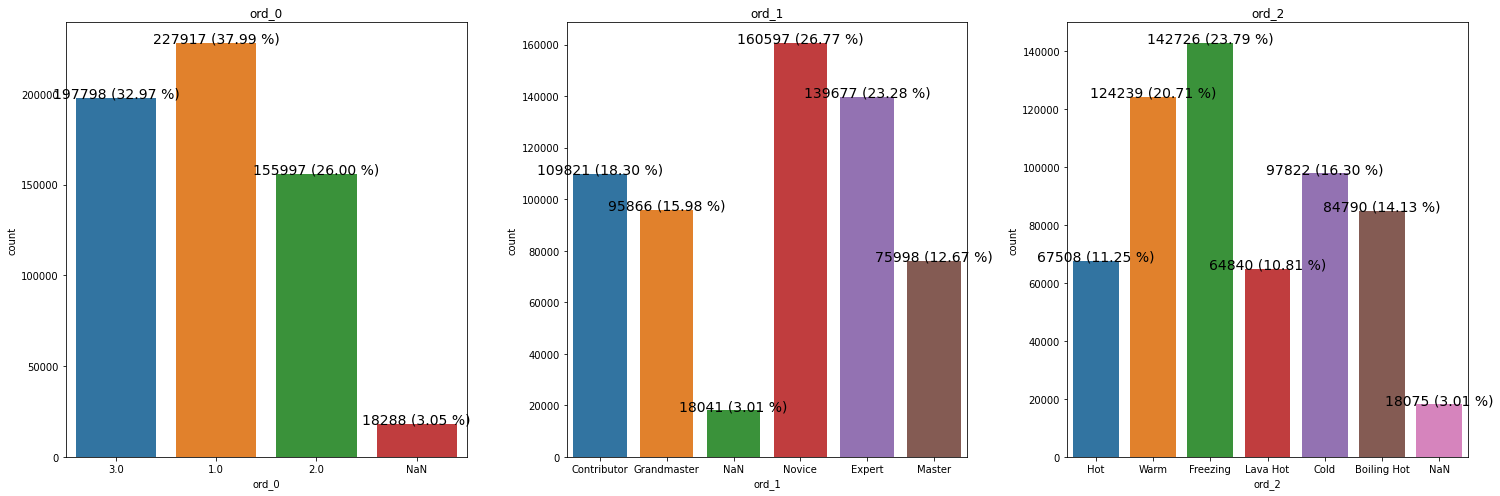

In [44]:
da_func.countplot_cols(train_df, ord_l, ncols=3, dropna=False)

ordinal
1. label encoding

In [53]:
ord_l_df = train_df.loc[:, ord_l].copy()
ord_l_df['ord_0'] = ord_l_df['ord_0'].fillna(0.)

ord_l_df['ord_1'] = ord_l_df['ord_1'].fillna('NaN')
le_ord_1 = OrdinalEncoder(categories=[['NaN', 'Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']])
ord_l_df['ord_1'] = le_ord_1.fit_transform(ord_l_df['ord_1'].values.reshape(-1, 1))

ord_l_df['ord_2'] = ord_l_df['ord_2'].fillna('NaN')
le_ord_2 = OrdinalEncoder(categories=[['Freezing', 'Cold', 'NaN', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']])
ord_l_df['ord_2'] = le_ord_2.fit_transform(ord_l_df['ord_2'].values.reshape(-1, 1))

ord_l_df

,ord_0,ord_1,ord_2
0,3.0,2.0,4.0
1,3.0,5.0,3.0
2,3.0,0.0,0.0
3,1.0,1.0,6.0
4,3.0,5.0,1.0
...,...,...,...
599995,3.0,1.0,0.0
599996,2.0,1.0,5.0
599997,2.0,2.0,0.0
599998,1.0,4.0,3.0


In [54]:
all_data['ord_l'] = [ord_l_df]

##### high-cardinality ordinal feature

In [55]:
print(ord_h)
display(train_df.loc[:, ord_h])

Index(['ord_3', 'ord_4', 'ord_5'], dtype='object')


,ord_3,ord_4,ord_5
0,c,U,Pw
1,e,X,pE
2,n,P,eN
3,a,C,NaN
4,h,C,OZ
...,...,...,...
599995,a,R,GZ
599996,n,N,sf
599997,n,H,MV
599998,m,X,Ey


In [63]:
train_df.loc[train_df['ord_3'].isna(), ord_h].index

Int64Index([    35,    100,    144,    251,    287,    335,    336,    341,
               342,    363,
            ...
            599629, 599664, 599669, 599791, 599833, 599849, 599917, 599958,
            599965, 599969],
           dtype='int64', length=17916)

cardinality가 높은 것도 높은 건데. 이게 순서가 의미가 있는 지 잘 모르겠다. 의미가 있는 순서대로의 클래스의 의미인지, 예를들어 라스트 네임의 이니셜을 따왔다거나 하는 의미 없는 순서인건지...

1. Leave One Out Encoding (잘 모르겠을땐 이거)
2. Label Encoding / ordinal encoding - 순서에 의미가 있다고 가정
  - ord_5같은 경우... 어쩌나? 대문자, 소문자 순서, 알파벳 순서... 앞글자 뒷글자 따로?

In [56]:
loo = ce.leave_one_out.LeaveOneOutEncoder(verbose=1, random_state=42)
ord_h_loo = loo.fit_transform(train_df.loc[:, ord_h], train_df['target'])
ord_h_loo

,ord_3,ord_4,ord_5
0,0.113526,0.222945,0.143639
1,0.135517,0.233754,0.236952
2,0.289387,0.201008,0.208805
3,0.091503,0.138987,0.184225
4,0.182086,0.138987,0.160167
...,...,...,...
599995,0.091503,0.207390,0.128109
599996,0.289387,0.187108,0.256899
599997,0.289387,0.162370,0.137202
599998,0.265993,0.233754,0.123257


In [72]:
ord_h_le = train_df.loc[:, ord_h].copy()
ord_h_le = ord_h_le.fillna('')

le = LabelEncoder()
ord_h_le['ord_3'] = le.fit_transform(ord_h_le['ord_3'])
ord_h_le['ord_4'] = le.fit_transform(ord_h_le['ord_4'])
ord_h_le['ord_5'] = le.fit_transform(ord_h_le['ord_5'])
ord_h_le

,ord_3,ord_4,ord_5
0,3,21,57
1,5,24,151
2,14,16,106
3,1,3,0
4,8,3,51
...,...,...,...
599995,1,18,23
599996,14,14,164
599997,14,8,43
599998,13,24,19


In [71]:
train_df['ord_5'].value_counts()

Fl    10562
DN     9527
Sz     8654
RV     5648
oJ     5596
      ...  
vw      189
gV      124
vQ      120
eA       91
Zv       87
Name: ord_5, Length: 190, dtype: int64

#### 시간 데이터

In [82]:
time_df = train_df[['day', 'month']]
for c in time_df.columns:
    print(c)
    print(time_df[c].value_counts())

day
3.0    113835
5.0    110464
6.0     97432
7.0     86435
1.0     84724
2.0     65495
4.0     23663
Name: day, dtype: int64
month
8.0     79245
3.0     70160
5.0     68906
12.0    68340
6.0     60478
7.0     53480
1.0     52154
11.0    51165
2.0     40700
9.0     20620
4.0     14614
10.0     2150
Name: month, dtype: int64


In [89]:
def circular_encoding(df, col):
    max_val = df[col].max()
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

In [90]:
circular_encoding(time_df.fillna(0.), 'day')

,day,month,day_sin,day_cos
0,6.0,3.0,-7.818315e-01,0.623490
1,7.0,7.0,-2.449294e-16,1.000000
2,5.0,9.0,-9.749279e-01,-0.222521
3,3.0,3.0,4.338837e-01,-0.900969
4,5.0,12.0,-9.749279e-01,-0.222521
...,...,...,...,...
599995,5.0,0.0,-9.749279e-01,-0.222521
599996,0.0,3.0,0.000000e+00,1.000000
599997,7.0,5.0,-2.449294e-16,1.000000
599998,1.0,5.0,7.818315e-01,0.623490
